# DeepLabCut Toolbox - demo for post processing

https://github.com/AlexEMG/DeepLabCut

In [1]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# this is example data from the public project: https://github.com/AlexEMG/DeepLabCut/tree/master/examples/openfield-Pranav-2018-10-30
video='m3v1mp4.mp4'
DLCscorer='DeepCut_resnet50_openfieldOct30shuffle1_15001'

dataname = str(Path(video).stem) + DLCscorer + '.h5'

#loading output of DLC
Dataframe = pd.read_hdf(os.path.join(dataname))


In [3]:
#Let's have a look at the data:

#these structures are awesome to manipulate, how -->> see pandas https://pandas.pydata.org/pandas-docs/stable/index.html
Dataframe.head()

scorer    DeepCut_resnet50_openfieldOct30shuffle1_15001                        \
bodyparts                                         snout                         
coords                                                x          y likelihood   
0                                             75.861072  88.507002   0.998635   
1                                             74.647148  86.439178   0.999414   
2                                             73.194103  84.019596   0.998932   
3                                             73.438760  80.511157   0.997915   
4                                             72.886618  78.118725   0.998793   

scorer                                                                        \
bodyparts    leftear                          rightear                         
coords             x           y likelihood          x          y likelihood   
0          72.025992  102.749917   0.999638  85.855313  90.199704   0.999799   
1          70.350068   99.621388   0.999836  85.889819  87.061889   0.999841   
2          70.259041   97.208403   0.999711  84.494195  84.364351   0.999868   
3          69.019256   94.777282   0.999723  83.491114  81.967655   0.999787   
4          68.076695   91.436165   0.999839  81.375813  78.291511   0.999795   

scorer                                        
bodyparts    tailbase                         
coords              x           y likelihood  
0          142.480108  180.372046   0.999833  
1          141.605256  179.365415   0.999991  
2          144.028973  175.509624   0.999990  
3          147.907935  174.848115   0.999971  
4          150.296287  170.733274   0.999970

In [4]:
# The plotting functions below are put here for simplicity and so that the user can edit them. Note that they 
# (or variants thereof) are in fact in standard DLC and accessible via:

import deeplabcut
deeplabcut.utils.plotting.PlottingResults?

In [5]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    plt.figure(figsize=fs)
    Time=np.arange(np.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=np.linspace(0,np.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][bp]['x'].values
        X[Index]=np.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][bp]['x'].values
        Y[Index]=np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))

<IPython.core.display.Javascript object>


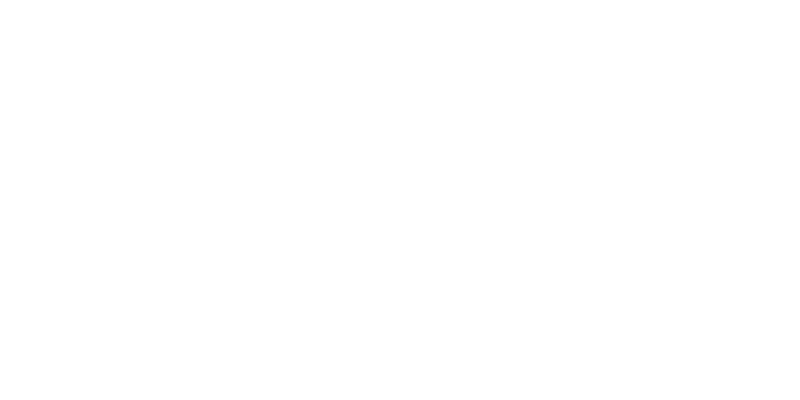

<IPython.core.display.Javascript object>


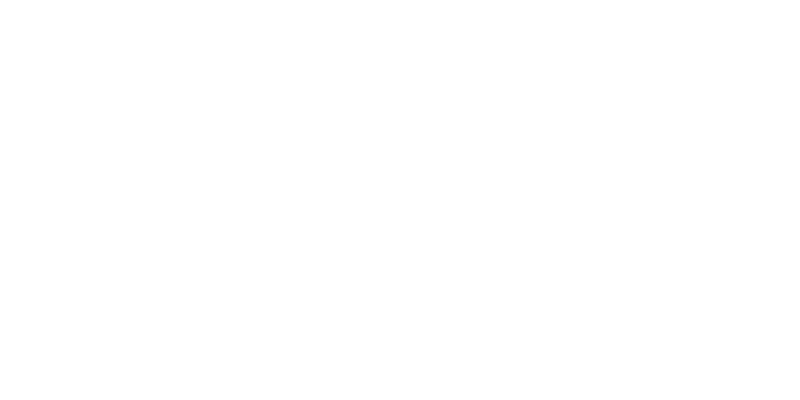

<IPython.core.display.Javascript object>


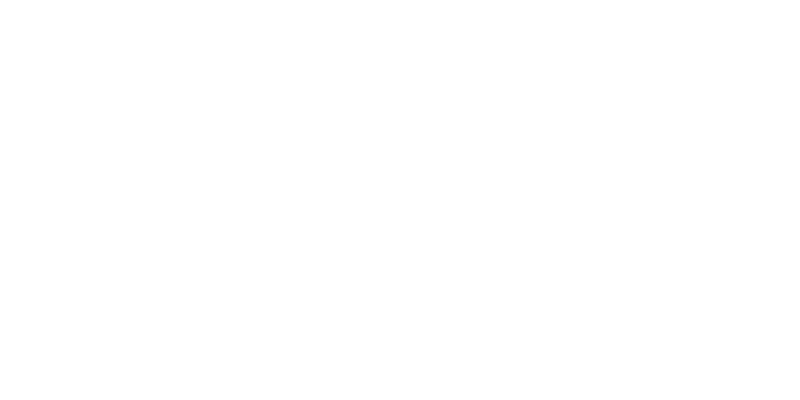

<IPython.core.display.Javascript object>


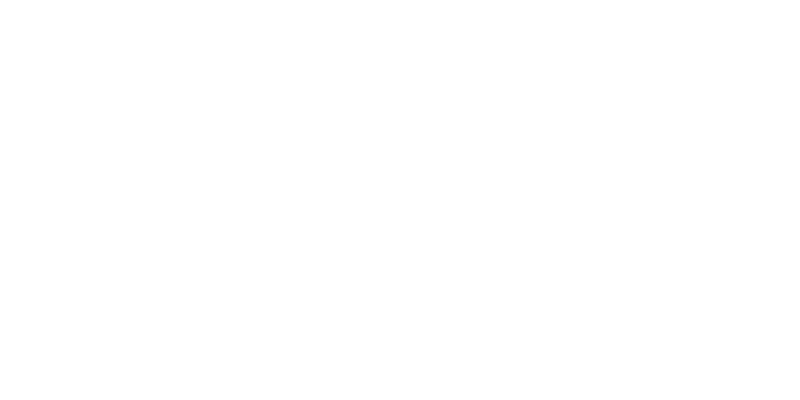

In [6]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot=bodyparts #you could also take a subset, i.e. =['snout']

%matplotlib notebook
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

# These plots can are interactive and can be customized (see https://matplotlib.org/) [in the code above]
# note that the snout and other bpts jitter in this example that was not trained for long.

## Great so let's use Federico's code for ROI analysis

Functions to extract time spent by the mouse in each of a list of user defined ROIS!

https://github.com/AlexEMG/DLCutils/blob/master/time_in_each_roi.py

In [7]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

#let's calculate velocity of the snout
bpt='snout'
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([Dataframe[DLCscorer][bpt]['x'].values.flatten(), Dataframe[DLCscorer][bpt]['y'].values.flatten()]).T)

fps=30 # frame rate of camera in those experiments
time=np.arange(len(vel))*1./fps
vel=vel #notice the units of vel are relative pixel distance [per time step]

# store in other variables:
xsnout=Dataframe[DLCscorer][bpt]['x'].values
ysnout=Dataframe[DLCscorer][bpt]['y'].values
vsnout=vel

<IPython.core.display.Javascript object>


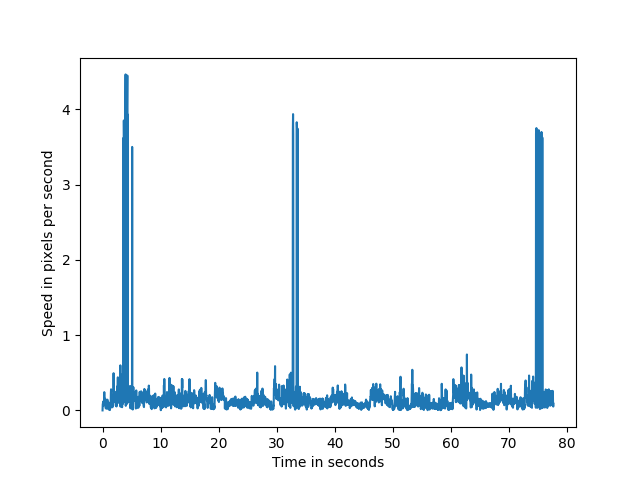

In [8]:
%matplotlib notebook

plt.plot(time,vel*1./fps)
plt.xlabel('Time in seconds')
plt.ylabel('Speed in pixels per second')
plt.show()

In [9]:
#define bounding boxes (here for left and right side of treadmill, displayed below)
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
bp_tracking = np.array((xsnout, ysnout, vsnout))

#two points defining each roi: topleft(X,Y) and bottomright(X,Y).
rois = {'leftside': position((0, 0), (300, 480)),'rightside': position((300, 0), (640, 480))} 
print(rois)

{'leftside': position(topleft=(0, 0), bottomright=(300, 480)), 'rightside': position(topleft=(300, 0), bottomright=(640, 480))}


<IPython.core.display.Javascript object>


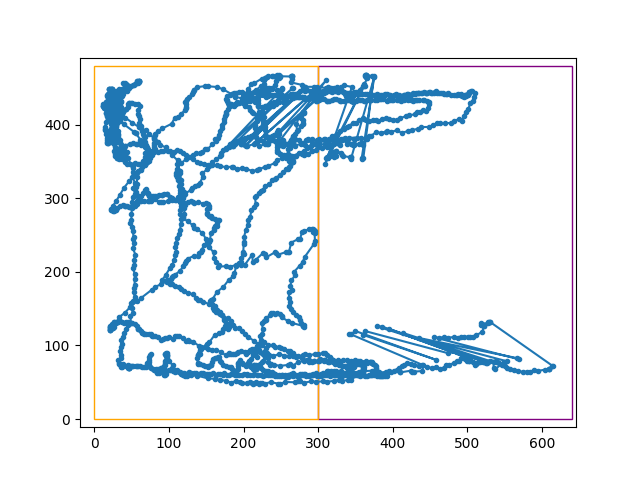

In [10]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

#plot snout + bounding boxes for rois
plt.plot(xsnout,ysnout,'.-')

rect = patches.Rectangle(rois['rightside'].topleft,rois['rightside'].bottomright[0]-rois['rightside'].topleft[0],rois['rightside'].bottomright[1]-rois['rightside'].topleft[1],linewidth=1,edgecolor='purple',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle(rois['leftside'].topleft,rois['leftside'].bottomright[0]-rois['leftside'].topleft[0],rois['leftside'].bottomright[1]-rois['leftside'].topleft[1],linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
plt.ylim(-11,491)
plt.show()

In [11]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

res = time_in_each_roi.get_timeinrois_stats(bp_tracking.T, rois, fps=30)

#print results:
res

{'avg_time_in_roi': {'leftside': 176.8, 'rightside': 56.2},
 'avg_time_in_roi_sec': {'leftside': 5.8933333333333335,
  'rightside': 1.8733333333333335},
 'avg_vel_in_roi': {'leftside': 4.798367612314975,
  'rightside': 7.978920763420923},
 'cumulative_time_in_roi': {'leftside': 1768, 'rightside': 562},
 'cumulative_time_in_roi_sec': {'leftside': 58.93333333333333,
  'rightside': 18.733333333333334},
 'transitions_per_roi': {'leftside': 10, 'rightside': 10}}